# HW 6

1. Translating Sentences:
10 pts
Write a function that translates sentences. The function takes two arguements, the sentence to be translated and tthe targeted language and returns the translated sentence.

In [2]:
# Your code here:

from googletrans import Translator
''' function to translate sentences '''
def translate_sentence(sentence, target_language):
    
    # Initialize the translator
    translator = Translator()
    
    # Translate the sentence
    translation = translator.translate(sentence, dest=target_language)
    
    # Return the translated text
    return translation.text

Take the following sentence and translate it from English to Spanish.
"Make a career of humanity. Commit yourself to the noble struggle for equal rights. You will make a better person of yourself, a greater nation of your country, and a finer world to live in."

In [4]:
sentence = "Make a career of humanity. Commit yourself to the noble struggle for equal rights. You will make a better person of yourself, a greater nation of your country, and a finer world to live in."
target_langauge = 'es'

trans1 = translate_sentence(sentence, target_langauge)
print(trans1)

Hacer una carrera de la humanidad.Comprométate con la noble lucha por la igualdad de derechos.Harás una mejor persona de ti mismo, una nación más grande de tu país y un mundo más fino para vivir.


2. Now translate it from Spanish to Chinese
2.5pts

In [6]:
#Your code here:

sentence = trans1
target_langauge = 'zh-TW' # code for traditional Chinese

trans2 = translate_sentence(sentence, target_langauge)
print(trans2)

通過為平等權利而努力的人類職業。


3. Now translate it from Chinese back to English.
2.5pts

In [8]:
#Your code here:

sentence = trans2
target_langauge = 'en'

trans3 = translate_sentence(sentence, target_langauge)
print(trans3)

Human occupations that work hard for equal rights.


4. Now do the same thing with ChatGPT.

2.5pts
Eng to Sp: Sp to Chinese: Chinese to Eng:



English to Spanish: "Dedica tu vida a la humanidad. Comprométete con la noble lucha por los derechos iguales. Harás de ti una mejor persona, de tu país una nación más grande, y del mundo un lugar mejor para vivir."

Spanish to Chinese: "奉献你的生命于人类。致力于为平等权利的崇高斗争。你将成为一个更好的人，你的国家将成为一个更伟大的民族，世界也将成为一个更美好的居住之地。"

Chinese to English: "Dedicate your life to humanity. Commit yourself to the noble struggle for equal rights. You will become a better person, your country will become a greater nation, and the world will become a better place to live."

5. Describe the difference in quality and features of output:
2.5pts

Your answer here:

ChatGPT's translation is much better! It seems that Google Translate loses a bit of meaning with each translation, and so the final English translation only sort of captures some of the words from the original sentence. ChatGPT's final English translation, however, communicates mostly the same meaning as the original sentence just with some wording changes.

 ## 7.  The Trump Card
Here is a link to a speech made by former President Trump on January 6: https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial. Not all of the text is his speech. Some of the text is the analysis. Please extract Donald Trump's speech only, remove stopwords and perform a word frequency distribution and visualize it.
20pts

In [14]:
#Your code here:

import requests
from bs4 import BeautifulSoup
import re # I asked ChatGPT to make punctuation its own string rather than including it as part of the previous word - important for word frequency analysis

base_url = 'https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial'
r = requests.get(base_url)
soup = BeautifulSoup(r.text)
paragraphs = soup.find_all('p')

# Initialize an empty list to store the text
doc_words = []

# Iterate through each paragraph
for p in paragraphs:
    # Get the text, strip whitespace, and split into words
    text = p.get_text().strip()
    # Use regex to split text into words (including apostrophes) and punctuation
    words = re.findall(r"\b\w+'\w+|\w+|[^\w\s]", text)
    # Extend the document list with the words
    doc_words.extend(words)

# Print the first 100 words and final 100 words to check above code
print(doc_words[:100])
print(doc_words[-100:])

['By', 'Brian', 'Naylor', 'Then', '-', 'President', 'Donald', 'Trump', 'speaks', 'to', 'supporters', 'from', 'the', 'Ellipse', ',', 'near', 'the', 'White', 'House', ',', 'on', 'Jan', '.', '6', 'ahead', 'of', 'that', "day's", 'insurrection', 'at', 'the', 'Capitol', '.', 'His', 'comments', 'are', 'a', 'key', 'part', 'of', 'the', 'impeachment', 'trial', 'against', 'him', '.', 'Brendan', 'Smialowski', '/', 'AFP', 'via', 'Getty', 'Images', 'hide', 'caption', 'Then', '-', 'President', 'Donald', 'Trump', 'speaks', 'to', 'supporters', 'from', 'the', 'Ellipse', ',', 'near', 'the', 'White', 'House', ',', 'on', 'Jan', '.', '6', 'ahead', 'of', 'that', "day's", 'insurrection', 'at', 'the', 'Capitol', '.', 'His', 'comments', 'are', 'a', 'key', 'part', 'of', 'the', 'impeachment', 'trial', 'against', 'him', '.', 'Former', 'President']
['anything', '.', 'Not', 'even', 'one', 'vote', '.', 'But', "we're", 'going', 'to', 'try', 'and', 'give', 'our', 'Republicans', ',', 'the', 'weak', 'ones', 'because', 't

In [15]:
# Find the index number of the string 'Well' - starts Trump speech
index = doc_words.index('Well')
print(index)

# Find the index number of the string 'Sponsor' - ends Trump speech
index2 = doc_words.index('Sponsor')
print(index2)

345
13417


In [16]:
# Remove text that appears before the statement begins.  
doc_words2 = doc_words[345:]

# Print check - first 10 words
print(doc_words2[:10])

# Remove text that appears after the statement ends. I don't think the index number from above is quite right - not sure why this is??
doc_words3 = doc_words2[:13072]

# Print check - final 10 words
print(doc_words3[-10:])

['Well', ',', 'thank', 'you', 'very', 'much', '.', 'This', 'is', 'incredible']
['incredible', '.', 'Thank', 'you', 'very', 'much', '.', 'Thank', 'you', '.']


In [17]:
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Convert all words in the text to lower case so they are no longer case sensitive
doc_lower = [word.lower() for word in doc_words3]

# Create list of stopwords
stopwords = nltk.corpus.stopwords.words('english')

# Add new stops - punctuation
new_stops = [',', '.', '"', '?', '000', ';']

stopwords.extend(new_stops)

# Remove stopwords from the text
doc_clean = []

for word in doc_lower:
    if not word in stopwords:
        doc_clean.append(word)

# Print check - first 100 words
print(doc_clean[:100])

['well', 'thank', 'much', 'incredible', 'media', 'show', 'magnitude', 'crowd', 'even', 'turned', 'today', 'looked', 'saw', 'thousands', 'people', 'see', 'hundreds', 'thousands', 'people', 'behind', 'want', 'show', 'hundreds', 'thousands', 'people', 'want', 'recognized', 'fake', 'news', 'media', 'turn', 'cameras', 'please', 'show', "what's", 'really', 'happening', 'people', 'going', 'take', 'longer', "they're", 'going', 'take', 'longer', 'go', 'ahead', 'turn', 'cameras', 'please', 'would', 'show', 'came', 'world', 'actually', 'came', 'country', 'really', 'want', 'see', 'want', 'see', 'covered', "i've", 'never', 'seen', 'anything', 'like', 'would', 'really', 'great', 'could', 'covered', 'fairly', 'media', 'media', 'biggest', 'problem', 'far', "i'm", 'concerned', 'single', 'biggest', 'problem', 'fake', 'news', 'big', 'tech', 'big', 'tech', 'coming', 'beat', 'four', 'years', 'ago', 'surprised', 'took', 'surprise', 'year', 'rigged']


In [18]:
# Display top 20 most frequently-appearing words

fdist1 = FreqDist(doc_clean)

fdist1_top20 = fdist1.most_common(20)
print(fdist1_top20)


[('people', 84), ('going', 73), ('want', 67), ('know', 58), ('get', 51), ('election', 44), ('country', 43), ('ballots', 43), ('got', 42), ('one', 41), ('votes', 41), ('go', 40), ('back', 40), ("that's", 39), ('said', 37), ('state', 36), ("we're", 35), ('right', 33), ('think', 33), ("they're", 32)]


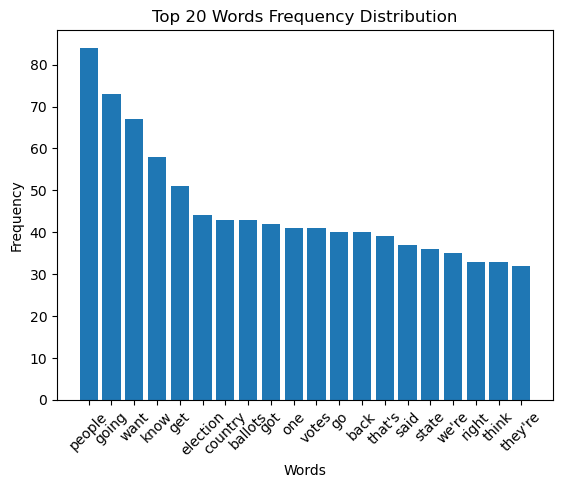

In [19]:
# I had to consult ChatGPT and other online sources for this as there was no way to include an x-axis label building off the code snippet from class: print(fdist1.plot(20))

import matplotlib.pyplot as plt

# Separate the words and their frequencies
words, frequencies = zip(*fdist1_top20)

# Create the bar chart
plt.bar(words, frequencies)

# Set the title and labels
plt.title('Top 20 Words Frequency Distribution')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

8. Here is a link to a github repo that contains Donald Trump's speeches: https://github.com/ryanmcdermott/trump-speeches/blob/master/speeches.txt
   
What are the 10 most common things Donald Trump "loves?"
10pts

In [21]:
#Your code and answer here:

# Download .txt file from Github and open
with open('trump_speeches.txt', 'r',  encoding = 'utf-8') as file:
    speeches = file.read()

# Initialize an empty list to store the words
speech_words = []

# Use regex to split the text into words (including apostrophes) and punctuation
words = re.findall(r"\b\w+'\w+|\w+|[^\w\s]", speeches)

# Extend the document list with the words
speech_words.extend(words)

# print check first 100 words
print(speech_words[:100])

['\ufeff', 'SPEECH', '1', '.', '.', '.', 'Thank', 'you', 'so', 'much', '.', "That's", 'so', 'nice', '.', "Isn't", 'he', 'a', 'great', 'guy', '.', 'He', "doesn't", 'get', 'a', 'fair', 'press', ';', 'he', "doesn't", 'get', 'it', '.', "It's", 'just', 'not', 'fair', '.', 'And', 'I', 'have', 'to', 'tell', 'you', "I'm", 'here', ',', 'and', 'very', 'strongly', 'here', ',', 'because', 'I', 'have', 'great', 'respect', 'for', 'Steve', 'King', 'and', 'have', 'great', 'respect', 'likewise', 'for', 'Citizens', 'United', ',', 'David', 'and', 'everybody', ',', 'and', 'tremendous', 'resect', 'for', 'the', 'Tea', 'Party', '.', 'Also', ',', 'also', 'the', 'people', 'of', 'Iowa', '.', 'They', 'have', 'something', 'in', 'common', '.', 'Hard', '-', 'working', 'people', '.']


In [22]:
# Convert all words in the text to lower case so they are no longer case sensitive
speech_lower = [word.lower() for word in speech_words]

In [23]:
# I adpated much of this code from ChatGPT.
# I asked ChaptGPT to "pull out the string combo 'i', 'love' and print out the subsequent strings that appear until some sort of punctuation appears ('.', ',', '?', ';')"

# Empty list to store results
results = []

# Iterate through the list of words
for i in range(len(speech_lower) - 1):
    if speech_lower[i] == 'i' and speech_lower[i+1] == 'love':
        # Start collecting words after 'i' and 'love'
        phrase = []
        j = i + 2  # Start after 'love'
        while j < len(speech_lower) and re.match(r'[^\.,\?;]', speech_lower[j]):  # Stop at punctuation
            phrase.append(speech_lower[j])
            j += 1
        results.append(' '.join(phrase))

# Print the first 10 results
for result in results [:10]:
    print(result)

the people of iowa
doing what i'm doing
evangelicals
the poorly educated
the country
the country
this place
this state
las vegas
you folks very much


In [24]:
# Frequency distribution of the results
fdist2 = FreqDist(results)

# Get the top 10 most common phrases
top_10_phrases = fdist2.most_common(10)

# Print the top 10 most common 'I love' phrases
for phrase, count in top_10_phrases:
    print(f"I love {phrase}: {count} times")

I love you: 7 times
I love it: 7 times
I love them: 6 times
I love china: 5 times
I love you too: 5 times
I love the people: 5 times
I love you all: 5 times
I love : 4 times
I love mexico: 4 times
I love the hispanics: 3 times


9. Which are the top 5 countries Trump mentions in his speeches, besides America or the United States of America?
10pts

In [26]:
#Your code and answer here:

# I asked ChatGPT to generate a list of lower case country names as strings. I manually removed the string 'united states'.

countries = [
    "afghanistan", "albania", "algeria", "andorra", "angola", "antigua and barbuda", "argentina", "armenia", "australia", "austria", 
    "azerbaijan", "bahamas", "bahrain", "bangladesh", "barbados", "belarus", "belgium", "belize", "benin", "bhutan", 
    "bolivia", "bosnia and herzegovina", "botswana", "brazil", "brunei", "bulgaria", "burkina faso", "burundi", "cabo verde", 
    "cambodia", "cameroon", "canada", "central african republic", "chad", "chile", "china", "colombia", "comoros", 
    "congo, democratic republic of the", "congo, republic of the", "costa rica", "croatia", "cuba", "cyprus", 
    "czech republic", "denmark", "djibouti", "dominica", "dominican republic", "east timor", "ecuador", "egypt", 
    "el salvador", "equatorial guinea", "eritrea", "estonia", "eswatini", "ethiopia", "fiji", "finland", "france", 
    "gabon", "gambia", "georgia", "germany", "ghana", "greece", "grenada", "guatemala", "guinea", "guinea-bissau", 
    "guyana", "haiti", "honduras", "hungary", "iceland", "india", "indonesia", "iran", "iraq", "ireland", 
    "israel", "italy", "jamaica", "japan", "jordan", "kazakhstan", "kenya", "kiribati", "korea, north", "korea, south", 
    "kosovo", "kuwait", "kyrgyzstan", "laos", "latvia", "lebanon", "lesotho", "liberia", "libya", "liechtenstein", 
    "lithuania", "luxembourg", "madagascar", "malawi", "malaysia", "maldives", "mali", "malta", "marshall islands", 
    "mauritania", "mauritius", "mexico", "micronesia", "moldova", "monaco", "mongolia", "montenegro", "morocco", 
    "mozambique", "myanmar", "namibia", "nauru", "nepal", "netherlands", "new zealand", "nicaragua", "niger", 
    "nigeria", "north macedonia", "norway", "oman", "pakistan", "palau", "panama", "papua new guinea", "paraguay", 
    "peru", "philippines", "poland", "portugal", "qatar", "romania", "russia", "rwanda", "saint kitts and nevis", 
    "saint lucia", "saint vincent and the grenadines", "samoa", "san marino", "sao tome and principe", "saudi arabia", 
    "senegal", "serbia", "seychelles", "sierra leone", "singapore", "slovakia", "slovenia", "solomon islands", "somalia", 
    "south africa", "south sudan", "spain", "sri lanka", "sudan", "suriname", "sweden", "switzerland", "syria", 
    "taiwan", "tajikistan", "tanzania", "thailand", "togo", "tonga", "trinidad and tobago", "tunisia", "turkey", 
    "turkmenistan", "tuvalu", "uganda", "ukraine", "united arab emirates", "united kingdom", 
    "uruguay", "uzbekistan", "vanuatu", "vatican city", "venezuela", "vietnam", "yemen", "zambia", "zimbabwe"
]

In [27]:
# Initialize a list to store countries mentioned in Trump's speeches
found_countries = []

# Iterate over every word in speech_lower
for word in speech_lower:
    # If the word is in countries_lowercase, add it to the found_countries list
    if word in countries:
        found_countries.append(word)

# Print a list of the first 10 found countries
print(found_countries[:10])

['china', 'china', 'china', 'mexico', 'china', 'iraq', 'iran', 'iran', 'syria', 'syria']


In [28]:
# Frequency distribution of the countries
fdist3 = FreqDist(found_countries)

# Top 5 most frequently appearing countries
top_5_countries = fdist3.most_common(5)

# Print the top 5 most frequently appearing countries and the number of times they appear
for country, count in top_5_countries:
    print(f"Country: {country}, Number of appearances: {count}")

Country: china, Number of appearances: 200
Country: mexico, Number of appearances: 159
Country: iran, Number of appearances: 91
Country: israel, Number of appearances: 84
Country: iraq, Number of appearances: 72



 In class we talked about tokenizing sentences into words, or parsing texts by single words(unigrams), or two words(bigrams). But you can also tokenize by sentences. Here is some sample code:


In [30]:
import nltk
from nltk.tokenize import sent_tokenize

text = "This is the first sentence. This is the second sentence."
sentences = sent_tokenize(text)

print(sentences)

['This is the first sentence.', 'This is the second sentence.']


In class we talked about final projects and I suggested one of the interesting uses of this technology is to consider conventional thinking on some subject and use Python to more comprehensively and critically evaluate that thinking. We touched on "political thinking" as a good place to apply Python language analyses. In political speeches, certain sentences or phrases are repeated to show a candidates coaching, focus or in marketing terms, "messaging." 

Here is an analyis from https://www.vox.com/2016/8/18/12423688/donald-trump-speech-style-explained-by-linguists of the "salesman" techniques that Trump uses: "Trump’s speeches can be appealing because he uses a lot of salesmen’s tricks. Lakoff, for his part, has an explanation for why Trump’s style of speaking is so appealing to many. Many of Trump’s most famous catchphrases are actually versions of time-tested speech mechanisms that salesmen use. They’re powerful because they help shape our unconscious. Take, for example, Trump’s frequent use of "Many people are saying..." or "Believe me" — often right after saying something that is baseless or untrue. This tends to sound more trustworthy to listeners than just outright stating the baseless claim, since Trump implies that he has direct experience with what he’s talking about. At a base level, Lakoff argues, people are more inclined to believe something that seems to have been shared. Or when Trump keeps calling Clinton "crooked," or keeps referring to terrorists as "radical Muslims," he’s strengthening the association through repetition. He also calls his supporters "folks," to show he is one of them (though many politicians employ this trick). Trump doesn’t repeat phrases and adjectives because he is stalling for time, Liberman says; for the most part, he’s providing emphasis and strengthening the association. These are normal techniques, particularly in conversational speech. "Is he reading cognitive science? No. He has 50 years of experience as a salesman who doesn’t care who he is selling to," Lakoff says. On this account, Trump uses similar methods in his QVC-style pitch of steaks and vodka as when he talks about his plan to stop ISIS."He has been doing this for a very long time as a salesman — that’s what he is best at," Lakoff says."  
*This is not to say I agree or disagree with this analysis.*  This is just one example of what we touched on in class. 

10. Perform a frequency analysis that provides evidence for or against the assertion made in the Vox article.
Consider tokenizing by unigram (one word), bigram(two words), trigram(three words) or more, or whole sentences or multiple approaches that help us understand the most common Trump linguistic characteristcs. Use your evidence and words to describe what you found. This is a fairly open ask. Don't just execute code. Tell me and show me something interesting!
20pts

In [33]:
#Your code and response here:

# First, start by analyzing unigrams, bigrams, and trigrams

## Remove stopwords from Trump's speeches (original list already augmented in previous code)

# Add new stops - punctuation
new_stops = ['’', '–', '—', '-', '$']

stopwords.extend(new_stops)

# Remove stopwords

clean_speech = []

for word in speech_lower:
    if not word in stopwords:
        clean_speech.append(word)

print(clean_speech[:50])

['\ufeff', 'speech', '1', 'thank', 'much', "that's", 'nice', 'great', 'guy', 'get', 'fair', 'press', 'get', 'fair', 'tell', "i'm", 'strongly', 'great', 'respect', 'steve', 'king', 'great', 'respect', 'likewise', 'citizens', 'united', 'david', 'everybody', 'tremendous', 'resect', 'tea', 'party', 'also', 'also', 'people', 'iowa', 'something', 'common', 'hard', 'working', 'people', 'want', 'work', 'want', 'make', 'country', 'great', 'love', 'people', 'iowa']


In [34]:
# Analyze unigrams

fdist4 = FreqDist(clean_speech)

fdist4_top20 = fdist4.most_common(20)
print(fdist4_top20)

[('going', 2055), ('people', 1338), ('know', 1315), ('said', 774), ('want', 760), ('great', 689), ('get', 633), ('like', 629), ('think', 626), ('one', 603), ('country', 535), ('say', 511), ('right', 501), ('look', 401), ('go', 392), ('money', 391), ('lot', 378), ('many', 367), ('got', 367), ('good', 357)]


In [35]:
# Analyze bigrams

fdist_by2 = list(nltk.bigrams(clean_speech))
fdist5 = FreqDist(fdist_by2)

fdist5_top20 = fdist5.most_common(20)
print(fdist5_top20)

[(('united', 'states'), 118), (("we're", 'going'), 117), (('going', 'happen'), 100), (('hillary', 'clinton'), 98), (('going', 'get'), 97), (('going', 'win'), 95), (('going', 'make'), 93), (('think', 'going'), 72), (('take', 'care'), 69), (('years', 'ago'), 65), (('make', 'america'), 65), (('number', 'one'), 63), (('thank', 'much'), 61), (('going', 'take'), 61), (('many', 'people'), 54), (('people', 'know'), 53), (('america', 'great'), 52), (('lot', 'money'), 49), (('lot', 'people'), 48), (('know', 'going'), 48)]


In [36]:
# Analyze trigrams

fdist_by3 = list(nltk.trigrams(clean_speech))
fdist6 = FreqDist(fdist_by3)

fdist6_top20 = fdist6.most_common(20)
print(fdist6_top20)

[(('make', 'america', 'great'), 48), (('going', 'take', 'care'), 39), (('going', 'build', 'wall'), 20), (('make', 'country', 'great'), 19), (('going', 'happen', 'going'), 19), (('going', 'make', 'america'), 18), (('thank', 'much', 'everybody'), 17), (('going', 'pay', 'wall'), 17), (('going', 'bring', 'back'), 17), (('going', 'get', 'rid'), 17), (('take', 'care', 'vets'), 15), (('(', 'ph', ')'), 15), (('thank', 'thank', 'much'), 14), (('mexico', 'going', 'pay'), 14), (('going', 'make', 'country'), 14), (('bring', 'jobs', 'back'), 14), (('going', 'happen', 'anymore'), 14), (('going', 'win', 'going'), 14), (('going', 'start', 'winning'), 13), (('happen', 'going', 'happen'), 13)]


In [37]:
# Tokenize speeches by sentence
sentences = nltk.sent_tokenize(speeches)

# Initialize a list to store tokenized sentences
tokenized_sentences = []

# Tokenize each sentence into words
for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    words_lower = [word.lower() for word in words]  # Convert each word to lowercase
    tokenized_sentences.append(words_lower)

# Print the first 5 tokenized sentences to check
for tokenized_sentence in tokenized_sentences[:5]:
    print(tokenized_sentence)

['\ufeffspeech', '1', '...', 'thank', 'you', 'so', 'much', '.']
['that', "'s", 'so', 'nice', '.']
['is', "n't", 'he', 'a', 'great', 'guy', '.']
['he', 'does', "n't", 'get', 'a', 'fair', 'press', ';', 'he', 'does', "n't", 'get', 'it', '.']
['it', "'s", 'just', 'not', 'fair', '.']


In [167]:
#tried running this code with the target phrase ['many', 'people', 'are', 'saying']

# Define the target phrase
target_phrase = ['believe', 'me']

# Find sentences that contain the exact phrase
matching_sentences = []

for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    words_lower = [word.lower() for word in words]  # Convert to lowercase
    
    # Check if the target phrase appears in the words in the same order
    for i in range(len(words_lower) - len(target_phrase) + 1):
        if words_lower[i:i+len(target_phrase)] == target_phrase:
            matching_sentences.append(sentence)
            break  # No need to check further in this sentence

# Print the matching sentences
print(len(matching_sentences))
print(matching_sentences[:15])

93
['Fences are easy, believe me.', 'Believe me if I did something you would have a border that would be great.', 'And believe me there are plans that are so much better for everybody.', 'I’m the only one — believe me, I know them all, I’m the only one who knows how to fix it.', 'And believe me, we have groups that no matter what you do, they will be the enemy.', 'Believe me.', 'Believe me.', 'They are not our friend, believe me.', 'They will not bring us — believe me — to the promised land.', 'Believe me, folks.', 'And believe me, you look at the border with Yemen.', 'Believe me.', 'Reduce our $18 trillion in debt, because, believe me, we’re in a bubble.', 'We have the greatest business leaders in the world on my team already and, believe me, we’re going to redo those trade deals and it’s going to be a thing of beauty.', 'I know people are going to find that a little bit hard to believe, but believe me, I am a unifier.']


In [211]:
# Find repeated phrases throughout Trump's speeches

import re

def find_repeated_phrases(text, phrase_length):
    ''' function to find repeated phrases in a string '''
    # Define a regular expression pattern to match repeated phrases (words/phrases)
    pattern = r'\b((?:\w+\s+){' + str(phrase_length-1) + r'}\w+)\b(?:\s+\1\b)+'
    
    # Find all repeated phrases using the regular expression
    repeated_phrases = re.findall(pattern, text, re.IGNORECASE)
    
    return repeated_phrases

# Create a list of punctuation to remove

remove_punc = [',', '.', '"', '?', '000', ';']

# Remove punctuation from the speeches
speech_clean = []

for word in speech_lower:
    if not word in remove_punc:
        speech_clean.append(word)

# Join the contents of speech_clean (list of strings) into a single string
single_string = ' '.join(speech_clean)

# Call the function and store the result with different values in phrase_length
repeat3 = find_repeated_phrases(single_string, phrase_length = 3)
repeat4 = find_repeated_phrases(single_string, phrase_length = 4)
repeat5 = find_repeated_phrases(single_string, phrase_length = 5)
repeat6 = find_repeated_phrases(single_string, phrase_length = 6)
repeat7 = find_repeated_phrases(single_string, phrase_length = 7)

# Print the first 10 3-word repeated phrases to check
print(repeat3[:10])

# Print the number of times each phrase of a certain length is repeated

print(len(repeat3))
print(len(repeat4))
print(len(repeat5))
print(len(repeat6))
print(len(repeat7))


['nothing ever happens', 'they were lost', 'be very careful', 'think of it', 'and i said', 'we love nevada', 'both of them', 'we love you', 'all the time', 'the real number']
101
66
25
17
8


There is good supporting evidence that Trump makes use of repetition to make voters believe he is more trustworthy/competent. Trigram analysis reveals the high frequency of classic Trump slogans such as "Make American Great Again" and that we are "going to build a wall" and that Mexico is "going to pay for it." Additionally, he is going to "bring jobs back." Surprisingly, there is no evidence of Trump stating the phrase "many people are saying..." in this selection of speeches, but he says the phrase "believe me" quite a bit (93 times in this selection of speeches). Trump uses subsequent repetition of phrases A LOT. In this selection of speeches, he repeats the same 4-word phrase one after another 66 times. He does this 25 times for 5-word phrases and 17 times for 6-word phrases. While I would be curious to compare this frequency of phrase repetition with other politicians, Trump seems to use this rhetorical technique quite a bit.

## 6. Mired in Mango Madness ##
20pts

Congratulations! In your last semester at Yale, you got a job at the World Bank ! 

Your first assignment is to address the dearth of good data in Mali on Mango quality and production. Your boss put you on a plane to Mali during the harvest season. You are excited, not only because your boss is annoying and wears too much cologne, but international travel is part of the excitement of an international job. You are excited to see the Great Mosque of Djenne, to watch the sunset from the Bandiagara Cliffs, and to dance the night away to  at Le Byblos. Oh yeah, there is the work too. After a particular "rough" night you meet with your colleagues at the office.  You thought you'd be able to just get by making eye contact and nodding while they did most of the work. After all, you are new to the role. No such luck. Your colleagues are thrilled that you can solve their problems by creating an automated call center. Their exact words are, "The Harvard grad ended up quitting, I'm glad we have someone from Yale here to make things right."

You are given an office and a computer. You may have slightly overstated your Python coding skills to get the job, but too late now. They ask if you mind if they watch you code. You tell them that you prefer to work alone, although ask them to lunch later to soften the push back. After the initial panic and hangover subsides you think back to your days in intermediate python at Yale, the encouraging words of your caring but demanding prof,  and then a light flashes in your mind and you think, "I got this." 

You've been tasked with the goal of setting up an automated call center to get data on current market prices, production and quality. There are growers who are both collectives who report these factors, and also smaller growers! Unfortunately, some of these are incentivized to underreport production and prices under the assumption that they will receive more foreign aid. Not all of them though! It's estimated that 10-20% of the self-reporting is innacurate. Callers call the center. Words are processed from speech to text. Text is processed, converted back to speech and then communicated to the caller. 

There are a few challenges you face: 
1. The speech to text algo was trained on French, but most of the farmers who call in speak Bambara. You must translate from Bambara to French, and then French to English, because your boss doesn't speak French and wants things in English and is completely unreasonable.
2. Sometimes the call just ends, sometimes words are sporadic, sometimes the algo. confuses the word "child" and the word "mango"
3. The call in number was once the number for the infant health hotline. People still use the number to try to get immediate emergency care for their infant. Their calls must be redirected or children could die and it would be your fault, not to mention an international incident.
4. The call number is often called by fans and musicians who are given the number by directory assistance because there is a music production company called Mango Mali, a fledgling world music group that markets music from Mali to France.
5. You must try to identify who is lying about their crop yield quality and prices.


**YOUR MISSION**

Write code that accepts the number as an input and then collects user input(in Bambara), translates it to French, and then outputs the data to a csv file in English. Please make sure you write code that addresses the challenges above (1-5). 
Create use cases to demonstrate that your code works and that you have addressed the basic use case, and that you have addressed challenges 1-5.

Notes: Googletrans does not support Bambara, so I used Spanish as the language of origin instead to show that I could translate from Bambara to French to English if the package supported the langauge. Additionally, I very frequently would get the error "TypeError: the JSON object must be str, bytes or bytearray, not NoneType." within my translator function. I have no idea why this is, but if I just re-run the cell a few times it usually resolves itself. It is, however, incredibly annoying!!! I'm not sure if this is a problem with my code or googletrans, but I've also included a standalone cell with just the translation code if you are able to diagnose the issue. 

The correct call center number is 555-555-5555.

In [161]:
from googletrans import Translator

# Initialize the translator
translator = Translator()

# Function to handle translation from Spanish to French to English
def translate_spanish_to_english(spanish_input):
    ''' translation from Spanish to French to English '''
    french_translation = translator.translate(spanish_input, src='es', dest='fr')
    french_text = french_translation.text
    
    english_translation = translator.translate(french_text, src='fr', dest='en')
    english_text = english_translation.text  # Store the English text

    return english_text

# Get input from the user
spanish_input = input("Gracias por llamar a Mali Mango Farmers Inc. ¿Cuál es el motivo de su llamada? (Translation: Thank you for calling Mali Mango Farmers Inc. What is your reason for calling?) ")
            
# Translate to English
english = translate_spanish_to_english(spanish_input)

# Print the translated text
print(english)

Gracias por llamar a Mali Mango Farmers Inc. ¿Cuál es el motivo de su llamada? (Translation: Thank you for calling Mali Mango Farmers Inc. What is your reason for calling?)  tengo una emergencia de mango


I have a mango emergency


In [163]:
from googletrans import Translator

# Initialize translator
translator = Translator()

def translate_spanish_to_english(spanish_input):
    '''' translation from Spanish to French to English '''
    french_translation = translator.translate(spanish_input, src='es', dest='fr')
    french_text = french_translation.text
    english_translation = translator.translate(french_text, src='fr', dest='en')
    return english_translation.text

def categorize_call(input_tokens):
    ''' categorize call based on key words '''
    if "child" in input_tokens or "emergency" in input_tokens:
        return "emergency"
    elif "music" in input_tokens:
        return "music"
    elif "mango" in input_tokens or "mangoes" in input_tokens:
        return "mango_farmer"
    else:
        return "unknown"

def collect_mango_farmer_data():
    ''' collect mango farmer data'''
    while True:
        try:
            bushels = int(input("¿Cuántas fanegas de mangos cosechaste el mes pasado? (Translation: How many bushels of mangos did you harvest last month)? "))
            price_per_bushel = float(input("¿A cuánto vendiste cada bushel (en francos CFA de África Occidental)? (Translation: How much did you sell each bushel for (in West African CFA francs)?) "))
            harvest_quality = int(input("¿Cuál fue la calidad de su cosecha en una escala del 1 al 5 (1 es una mala cosecha y 5 es una gran cosecha)? (Translation: What was the quality of your harvest on a scale of 1-5 (1 is a poor harvest and 5 is a great harvest)?) "))
            num_workers = int(input("¿Cuántos trabajadores emplea su granja? (Translation: How many workers are employed by your farm?) "))

            # Investigate farms with suspiciously low yields or prices for the size of the farm (I created arbitrary numbers)
            if num_workers >= 20:
                investigate = 1 if (bushels < 100 and price_per_bushel < 1000) else 0
            else:
                investigate = 1 if (bushels < 30 and price_per_bushel < 750) else 0

            return [bushels, price_per_bushel, harvest_quality, num_workers, investigate]
        except ValueError:
            print("Entrada no válida. Asegúrese de ingresar números cuando corresponda. (Translation: Invalid input. Please ensure you are entering numbers where appropriate.)")

def handle_call_category(call_category):
    ''' handle mango farmer call category '''
    if call_category == "mango_farmer":
        data = collect_mango_farmer_data()
        save_to_csv(data)
        return "Datos guardados exitosamente. Gracias por informar sobre su cosecha de mango. (Translation: Data saved successfully. Thank you for reporting your mango harvest.)"
    else:
        return "Entrada no reconocida. Llamada terminada. (Translation: Unrecognized input. Call terminated.)"

def save_to_csv(data):
    ''' save mango farmer data to CSV '''
    with open('mango_data.csv', mode='a', newline='') as file:
        writer = csv.writer(file)
        if file.tell() == 0:  # Add headers if the file is empty
            writer.writerow(["Bushels", "Price Per Bushel", "Harvest Quality", "Number of Workers", "Investigate"])
        writer.writerow(data)

def process_call():
    ''' process the call '''
    phone_number = input("Por favor introduzca un número de teléfono: (Translation: Please enter a phone number:) ")
    
    if phone_number == "555-555-5555":
        attempts = 0
        while attempts < 3:  # Limit the number of attempts
            spanish_input = input("Gracias por llamar a Mali Mango Farmers Inc. ¿Cuál es el motivo de su llamada? (Translation: Thank you for calling Mali Mango Farmers Inc. What is your reason for calling?) ")
            english_response = translate_spanish_to_english(spanish_input)
            input_tokens = english_response.lower().split()  # Simple tokenization

            call_category = categorize_call(input_tokens)

            if call_category == "emergency":
                response = input("¿Está intentando comunicarse con la línea directa de salud infantil? ¿Sí o no? (Translation: Are you trying to reach the infant health hotline? Yes or no?) ").lower()
                if response == "si":
                    return "El número de la línea directa de salud infantil es 333-333-3333. (Translation: The number for the infant health hotline is 333-333-3333.)"
                elif response == "no":
                    attempts += 1
                    continue  # Restart the sequence
                else:
                    print("Por favor responda con sí o no.")
                
            elif call_category == "music":
                response = input("¿Estás intentando comunicarte con la productora musical Mango Mali? ¿Sí o no? (Translation: Are you trying to reach the music production company Mango Mali? Yes or no?) ").lower()
                if response == "si":
                    return "El número de Mango Mali es 444-444-4444. (Translation: The number for Mango Mali is 444-444-4444)."
                elif response == "no":
                    attempts += 1
                    continue  # Restart the sequence
                else:
                    print("Por favor responda con sí o no.")
                
            elif call_category == "mango_farmer":
                response = input("¿Es usted un agricultor de mangos? ¿Sí o no? (Translation: Are you a mango farmer? Yes or no?) ").lower()
                if response == "si":
                    return handle_call_category(call_category)
                elif response == "no":
                    attempts += 1
                    continue  # Restart the sequence
                else:
                    print("Por favor responda con sí o no.")
            
            print("Entrada no reconocida. Por favor inténtalo de nuevo. (Translation: Unrecognized input. Please try again.)")
            attempts += 1
        
        return "Se alcanzó el máximo de intentos. Llamada terminada. (Translation: Max attempts reached. Call terminated.)"

    else:
        print("El número al que llamas no está disponible. Por favor inténtalo de nuevo. (Translation: The number you are calling is not available. Please try again.)")
        return

def main():
    ''' simulate a call '''
    print("Simulating a call...")
    result = process_call()
    if result:
        print(f"Result: {result}")

if __name__ == "__main__":
    main()

Simulating a call...


Por favor introduzca un número de teléfono: (Translation: Please enter a phone number:)  555-555-5555
Gracias por llamar a Mali Mango Farmers Inc. ¿Cuál es el motivo de su llamada? (Translation: Thank you for calling Mali Mango Farmers Inc. What is your reason for calling?)  tengo una emergencia de mango
¿Está intentando comunicarse con la línea directa de salud infantil? ¿Sí o no? (Translation: Are you trying to reach the infant health hotline? Yes or no?)  no
Gracias por llamar a Mali Mango Farmers Inc. ¿Cuál es el motivo de su llamada? (Translation: Thank you for calling Mali Mango Farmers Inc. What is your reason for calling?)  mango
¿Es usted un agricultor de mangos? ¿Sí o no? (Translation: Are you a mango farmer? Yes or no?)  si
¿Cuántas fanegas de mangos cosechaste el mes pasado? (Translation: How many bushels of mangos did you harvest last month)?  200
¿A cuánto vendiste cada bushel (en francos CFA de África Occidental)? (Translation: How much did you sell each bushel for (in W

Result: Datos guardados exitosamente. Gracias por informar sobre su cosecha de mango. (Translation: Data saved successfully. Thank you for reporting your mango harvest.)
